In [1]:
import numpy as np
from skimage import filters, data, transform, feature
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from skimage.color import rgb2gray

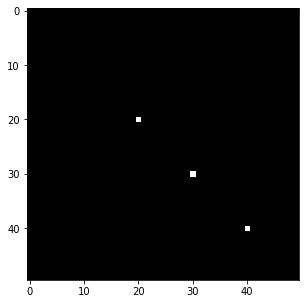

In [17]:
#testovaci obrazok
image = np.zeros((50,50))
image[20,20] = 1
image[30,30] = 1
image[40,40] = 1

plt.figure(figsize=(5,5))
plt.imshow(image,cmap='gray')


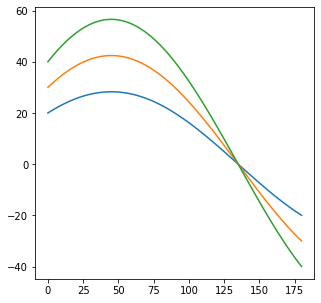

In [22]:
thetas = np.arange(0, np.pi, 0.02)
rho_stack = []

x,y = np.where(image == 1)
plt.figure(figsize=(5,5))
for i in range(0, x.size):
    rhos = x[i] * np.cos(thetas) + y[i] * np.sin(thetas)
    rho_stack.append(rhos)
    plt.plot(np.rad2deg(thetas),rhos)

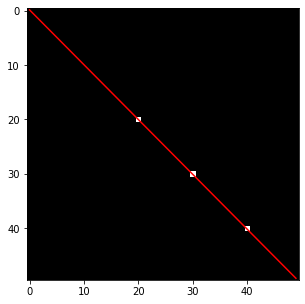

In [35]:
rho_stack = np.array(rho_stack)

r1 = np.abs(rho_stack[0,:] - rho_stack[1,:])
r2 = np.abs(rho_stack[0,:] - rho_stack[2,:])
r3 = np.abs(rho_stack[2,:] - rho_stack[1,:])

min_dif = np.where((r1+r2+r3) == np.min(r1+r2+r3))
rho_winner = rho_stack[0, min_dif]
theta_winner = thetas[min_dif]

line_x = np.array([0, image.shape[1]-1])
line_y = (-np.cos(theta_winner)/np.sin(theta_winner))*line_x + rho_winner/np.sin(theta_winner)

plt.figure(figsize=(5,5))
plt.imshow(image,cmap='gray')
plt.plot(line_x.ravel(), line_y.ravel(), color = 'red')

In [24]:
accumulator = []
for i in range(0,x.size):
    rhos = x[i] *np.cos(thetas) + y[i]* np.sin(thetas)
    accumulator.append(rhos)
accumulator = np.array(rho_stack)

D = np.sqrt(image.shape[0]**2+ image.shape[1]**2)  # uhlopriecka
rho_range =np.arange(-image.shape[1],D,1) # ake realne hodnoty moze naberat priamka v obraze?

Text(0, 0.5, 'Rhos - premapovane do disk. priestoru ')

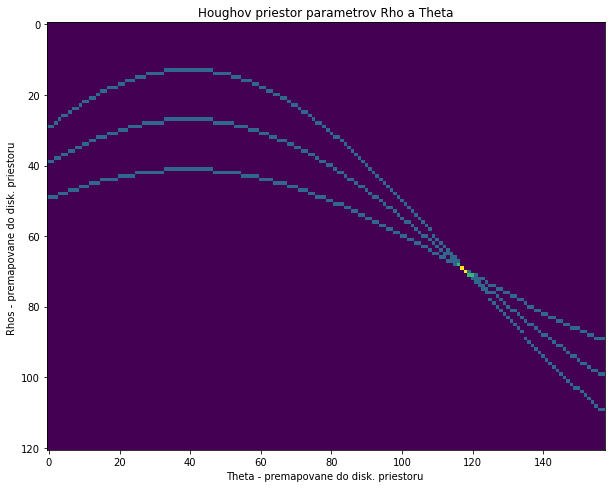

In [25]:
hough_space = np.zeros((rho_range.size, thetas.size))
for i in range(0,thetas.size):
    rho_vals = accumulator[:,i]
    y_hist, x_hist = np.histogram(rho_vals, rho_range)
    hough_space[:hough_space.shape[0]-1, i] = np.flipud(y_hist)
plt.figure(figsize=(10,10))
plt.imshow(hough_space)

plt.title("Houghov priestor parametrov Rho a Theta")
plt.xlabel("Theta - premapovane do disk. priestoru ")
plt.ylabel("Rhos - premapovane do disk. priestoru ")

In [37]:
max_hough = np.max(hough_space)
x, y = np.where(hough_space == max_hough)
theta_winner= thetas[y[1]]
rho_winner = rho_range[rho_range.size - x[1]]

print('{0} and {1}'.format(theta_winner,rho_winner))

2.36 and 1.0


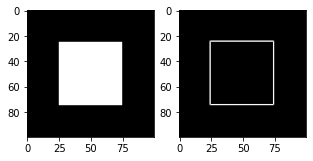

In [56]:
plt.figure(figsize=(5,5))
image_2 = np.zeros((100, 100))
image_2[25:75,25:75] = 255
plt.subplot(121)
plt.imshow(image_2,cmap='gray')
image_2 = filters.roberts(image_2) #detekovane hrany
plt.subplot(122)
plt.imshow(image_2,cmap='gray')

Text(0, 0.5, 'Rhos')

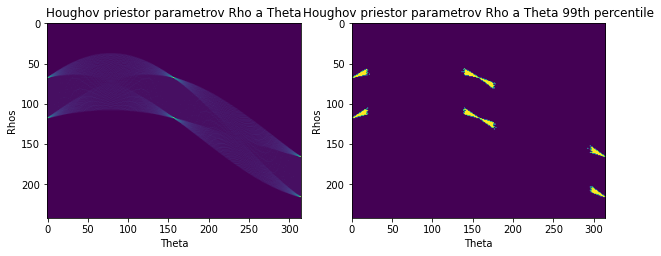

In [54]:
width, height = image_2.shape
D = np.sqrt((height**2 + width**2))

thetas = np.arange(0,np.pi,0.01)
rhos = np.arange(-width,D,1)

hough_space = np.zeros((rhos.size, thetas.size)) #houghov priestor parametrov pre detekovane hrany

x, y = np.where(image_2 > 0)

accumulator = np.zeros((x.size, thetas.size))

cos_vals = np.matmul(np.expand_dims(np.arange(0,width,1),axis=0).T,
                     np.expand_dims(np.cos(thetas),axis=0))

sin_vals = np.matmul(np.expand_dims(np.arange(0,height,1),axis=0).T,
                     np.expand_dims(np.sin(thetas),axis=0))

x_match = cos_vals[x,:]
y_match = sin_vals[y,:]

accumulator[:,:] =  x_match + y_match

for i in range(0,thetas.size):
    rho_vals = accumulator[:,i]
    y_hist, x_hist = np.histogram(rho_vals, rhos)
    hough_space[1:,i] = np.flipud(y_hist)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(hough_space)
plt.title("Houghov priestor parametrov Rho a Theta")
plt.xlabel("Theta")
plt.ylabel("Rhos")
plt.subplot(122)
plt.imshow(hough_space> np.percentile(hough_space,99))
plt.title("Houghov priestor parametrov Rho a Theta 99th percentile")
plt.xlabel("Theta")
plt.ylabel("Rhos")

[(67, 0), (67, 156), (117, 0), (117, 156), (165, 313), (215, 313)]


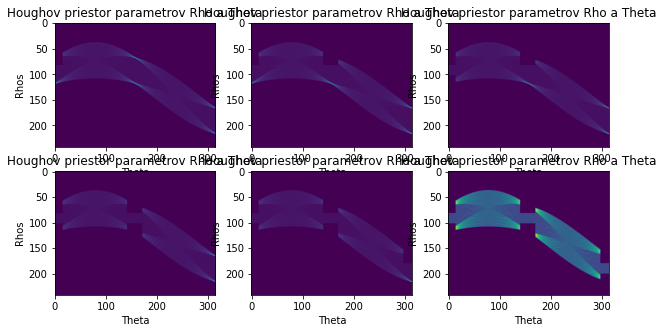

In [55]:
thresh = 0.5*np.max(hough_space)
supp = 15
continue_search = True
peaks = []

plt.figure(figsize=(10,5))
j = 0
while continue_search:
    value = np.max(hough_space)
    index = np.where(hough_space == value)
    idx = (index[0][0], index[1][0])

    if value > thresh:
        peaks.append(idx)

        x_min = idx[1] - supp
        if x_min < 0: x_min = 0
        x_max = idx[1] + supp
        if x_max > hough_space.shape[1]: x_max = hough_space.shape[1]

        y_min = idx[0] - supp
        if y_min < 0: y_min = 0
        y_max = idx[0] + supp
        if y_max > hough_space.shape[0]: y_max = hough_space.shape[0]

        hough_space[y_min:y_max, x_min:x_max] = 0
        j = j+1
        plt.subplot(2,3,j)
        plt.imshow(hough_space)
        plt.title("Houghov priestor parametrov Rho a Theta")
        plt.xlabel("Theta")
        plt.ylabel("Rhos")

    else:
        continue_search = False

print(peaks)

<ipython-input-63-ddd148f6cb3d>:9: RuntimeWarning: divide by zero encountered in double_scalars
  line_y = (-np.cos(theta)/np.sin(theta))*line_x + rho/np.sin(theta)
<ipython-input-63-ddd148f6cb3d>:9: RuntimeWarning: invalid value encountered in multiply
  line_y = (-np.cos(theta)/np.sin(theta))*line_x + rho/np.sin(theta)
<ipython-input-63-ddd148f6cb3d>:9: RuntimeWarning: invalid value encountered in add
  line_y = (-np.cos(theta)/np.sin(theta))*line_x + rho/np.sin(theta)
<ipython-input-63-ddd148f6cb3d>:13: RuntimeWarning: divide by zero encountered in double_scalars
  line_x = (line_y - rho/np.sin(theta))*(np.sin(theta)/np.cos(theta))
<ipython-input-63-ddd148f6cb3d>:13: RuntimeWarning: invalid value encountered in multiply
  line_x = (line_y - rho/np.sin(theta))*(np.sin(theta)/np.cos(theta))


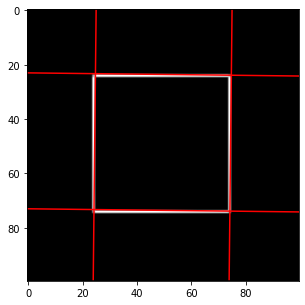

In [63]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.imshow(image_2, cmap='gray')

for peak in peaks:
    rho = rhos[rhos.size - peak[0]]
    theta = thetas[peak[1]]
    line_x = np.array([[0, image_2.shape[1]-1]])
    line_y = (-np.cos(theta)/np.sin(theta))*line_x + rho/np.sin(theta)

    if np.sum(np.isnan(line_y)) > 0:
        line_y = np.array([[0, image_2.shape[0]-1]])
        line_x = (line_y - rho/np.sin(theta))*(np.sin(theta)/np.cos(theta))

    ax.add_line(lines.Line2D(line_y, line_x,color='red'))

plt.show()

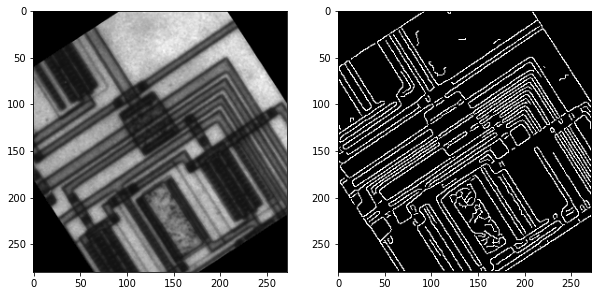

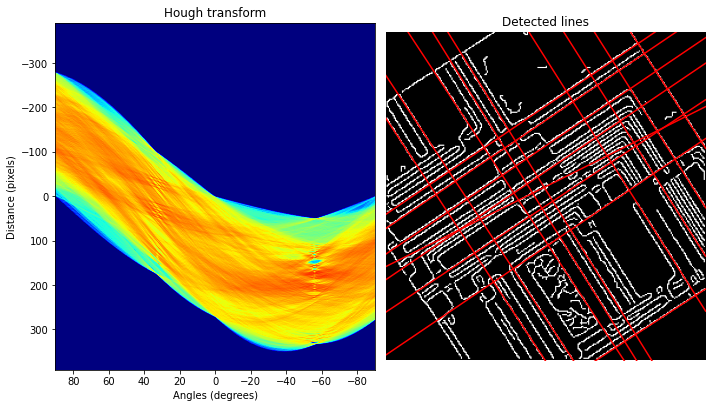

In [72]:
from PIL import Image
circuit_tif = Image.open('circuit.tif')
circuit= transform.rotate(np.array(circuit_tif),33,mode='constant')
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(circuit,cmap='gray')

BW = feature.canny(circuit)
plt.subplot(122)
plt.imshow(BW,cmap='gray')


tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360)
h, theta, d = transform.hough_line(BW, theta=tested_angles)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
ax = axes.ravel()
ax[0].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap='jet', aspect=1/4)
ax[0].set_title('Hough transform')
ax[0].set_xlabel('Angles (degrees)')
ax[0].set_ylabel('Distance (pixels)')

ax[1].imshow(BW, cmap='gray')
origin = np.array((0, BW.shape[1]))
for _, angle, dist in zip(*transform.hough_line_peaks(h, theta, d)):
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[1].plot(origin, (y0, y1), '-r')
ax[1].set_xlim(origin)
ax[1].set_ylim((BW.shape[0], 0))
ax[1].set_axis_off()
ax[1].set_title('Detected lines')

plt.tight_layout()
plt.show()


# Uloha je ukazana na zadani